In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv("covid_country.csv")

In [85]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [87]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [88]:
df["Deaths"].max()

98913

In [89]:
df["Deaths"].min()

0

In [90]:
df.head(50)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [91]:
dfnew=df.loc[df["Confirmed"]!=0]

In [92]:
dfnew.drop("Date",axis=1,inplace=True)

C:\Users\Preeti kumari\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
dfnew.drop('Country',axis=1,inplace=True)

In [94]:
dfnew.skew()

Confirmed    15.219955
Recovered     8.645393
Deaths       11.541737
dtype: float64

In [95]:
import numpy as np
for col in dfnew.columns:
    if dfnew.skew().loc[col]>1.5:
        dfnew[col]=np.log1p(dfnew[col])

<ipython-input-95-b1eaaafab558>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew[col]=np.log1p(dfnew[col])


In [96]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [97]:

dfnew.describe()

,Confirmed,Recovered,Deaths
count,15632.000000,15632.000000,15632.000000
mean,5.610391,3.886098,2.429811
std,2.988591,3.175233,2.578658
min,0.693147,0.000000,0.000000
25%,2.995732,0.693147,0.000000
50%,5.631212,3.496508,1.791759
75%,7.696667,6.282267,3.951244
max,14.334848,12.860747,11.502006


In [98]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dfnew))
threshold=3


In [99]:
z

array([[0.2334643 , 0.16339538, 0.17861038],
       [1.509716  , 1.22391723, 0.94230743],
       [1.64539133, 1.22391723, 0.94230743],
       ...,
       [0.02975764, 0.46870579, 0.57481792],
       [0.40658205, 0.60910411, 0.13587723],
       [0.52445798, 0.19778744, 0.31814978]])

In [100]:
dfnew =dfnew[(z < 3).all(axis=1)]


In [101]:
dfnew

,Confirmed,Recovered,Deaths
36,6.308098,3.367296,2.890372
87,1.098612,0.000000,0.000000
91,0.693147,0.000000,0.000000
165,0.693147,0.000000,0.000000
168,1.098612,0.000000,0.000000
...,...,...,...
23683,6.063785,5.902633,1.386294
23684,2.302585,1.945910,0.693147
23685,5.521461,2.397895,3.912023
23686,6.825460,5.820083,2.079442


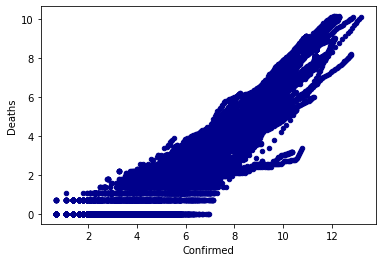

In [102]:
 dfnew.plot.scatter(x='Confirmed',
                      y='Deaths',
                      c='DarkBlue')

In [103]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [104]:
x=np.array(dfnew["Confirmed"]).reshape((-1, 1))
y=np.array(dfnew["Deaths"])

In [105]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2_ score corresponding to ",final_r_state,"is",max_r_score)
#checking best random state and then r2_score

max r2_ score corresponding to  54 is 0.8242817210853689


In [106]:
print("r2_score is:",r2_score(y_test,y_pred))
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is: 0.810494947998401
RMSE is: 1.0736923161720062


In [107]:
cross_val_score(lr,x,y,cv=10,scoring="r2").mean()

0.682793820081572

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=99)
regressor.fit(x_train,y_train)
y_pred_=regressor.predict(x_test)
r2_scr=r2_score(y_test,y_pred_)
cross_val_score(regressor, x, y, cv=10,scoring="r2").mean()
r2_scr

0.8308509747958587

In [112]:
import joblib
joblib.dump(regressor,"dt_covid_19.pkl")

['dt_covid_19.pkl']